In [1]:
# importing all the libraries which requires to implement VGG16

import os
import shutil
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
print(os.listdir("./data/"))

['sampleSubmission.csv', 'test', 'train', 'train.zip', 'train1']


In [3]:
# Sorting out our cats and dogs images into respective folders
# for train data
filenames = os.listdir("./data/train1")

srcpath = "./data/train1"
destdogs = "./data/train/dogs"
destcats = "./data/train/cats"

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        filepath = os.path.join(srcpath, filename)
        if not os.path.isdir(destdogs):
            os.makedirs(destdogs)
        shutil.copy(filepath, destdogs)
    else:
        filepath = os.path.join(srcpath, filename)
        if not os.path.isdir(destcats):
            os.makedirs(destcats)
        shutil.copy(filepath, destcats)

In [5]:
# Now lets move some data into test folder for testing
testdogs = "./data/test/dogs"
testcats = "./data/test/cats"

srcdogs = "./data/train/dogs"
srccats = "./data/train/cats"

dogsnames = os.listdir("./data/train/dogs")

for filename in dogsnames:
    number = filename.split('.')[1]
    if int(number) >= 2001:
        continue    
    filepath = os.path.join(srcdogs, filename)
    if not os.path.exists(testdogs):
        os.makedirs(testdogs)
    shutil.move(filepath, testdogs)


catsnames = os.listdir("./data/train/cats")

for filename in catsnames:
    number = filename.split('.')[1]
    if int(number) >= 2001:
        continue    
    filepath = os.path.join(srccats, filename)
    if not os.path.exists(testcats):
        os.makedirs(testcats)
    shutil.move(filepath, testcats)

In [6]:
# Folder structure
# train
#  |-----dogs
#  |-----cats
# test
#  |-----dogs
#  |-----cats

train_data = ImageDataGenerator()
traindata = train_data.flow_from_directory(directory="./data/train", target_size=(224,224))
test_data = ImageDataGenerator()
testdata = test_data.flow_from_directory(directory='./data/test', target_size=(224,224))

Found 20998 images belonging to 2 classes.
Found 4002 images belonging to 2 classes.


In [7]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))

model.add(Dense(units=2, activation="softmax"))

W1228 13:31:34.879611 38740 deprecation_wrapper.py:119] From C:\Users\saanvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1228 13:31:34.954413 38740 deprecation_wrapper.py:119] From C:\Users\saanvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1228 13:31:34.960396 38740 deprecation_wrapper.py:119] From C:\Users\saanvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1228 13:31:35.153437 38740 deprecation_wrapper.py:119] From C:\Users\saanvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [8]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

W1228 13:31:36.467322 38740 deprecation_wrapper.py:119] From C:\Users\saanvi\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1228 13:31:36.495248 38740 deprecation_wrapper.py:119] From C:\Users\saanvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)       295168    
__________

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor="val_acc", 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode="auto", 
                             period=1)

early = EarlyStopping(monitor="val_acc", 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode="auto")

hist = model.fit_generator(steps_per_epoch=10, 
                           generator=traindata, 
                           validation_data=testdata, 
                           validation_steps=5, 
                           epochs=5, 
                           callbacks=[checkpoint, early])

W1228 13:31:36.941054 38740 deprecation.py:323] From C:\Users\saanvi\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1228 13:31:37.590320 38740 deprecation_wrapper.py:119] From C:\Users\saanvi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
10/10 [==============================] - 353s 35s/step - loss: 6.5882 - acc: 0.5281 - val_loss: 8.6635 - val_acc: 0.4625

Epoch 00001: val_acc improved from -inf to 0.46250, saving model to vgg16_1.h5
Epoch 2/5
10/10 [==============================] - 323s 32s/step - loss: 8.3613 - acc: 0.4813 - val_loss: 8.7642 - val_acc: 0.4562

Epoch 00002: val_acc did not improve from 0.46250
Epoch 3/5
10/10 [==============================] - 328s 33s/step - loss: 8.8146 - acc: 0.4531 - val_loss: 6.9509 - val_acc: 0.5687

Epoch 00003: val_acc improved from 0.46250 to 0.56875, saving model to vgg16_1.h5
Epoch 4/5
10/10 [==============================] - 318s 32s/step - loss: 7.6561 - acc: 0.5250 - val_loss: 7.1524 - val_acc: 0.5563

Epoch 00004: val_acc did not improve from 0.56875
Epoch 5/5
10/10 [==============================] - 323s 32s/step - loss: 8.7138 - acc: 0.4594 - val_loss: 9.1672 - val_acc: 0.4313

Epoch 00005: val_acc did not improve from 0.56875


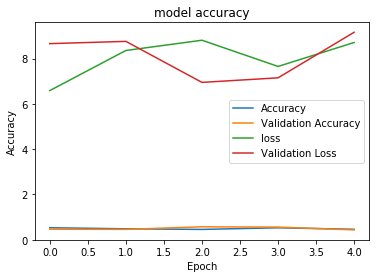

In [10]:
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()